## 오픈소스 프로젝트

### 서울시 구별 대여소 및 거치대의 개수

In [2]:
#데이터불러오기 
#cp949 인코딩 사용 한글 데이터 커버
#각종 패키지 불러오기
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
font_path = './NanumGothic.ttf' # 나눔고딕폰트 사용
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False #minus 폰트깨짐 방지

plt.style.use('seaborn')
sns.set(font="NanumGothic", 
rc={"axes.unicode_minus":False}) #seaborn 한글폰트사용

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
Data1 = pd.read_csv('data-set/공공자전거 대여소 정보(21.01.31 기준).csv', encoding = 'cp949')

In [11]:
#데이터 확인 -> 컬럼명 수정 및 결측치 확인한다
Data1.head(10)

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,NaN,LCD
5,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12,NaN,LCD
6,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8,NaN,LCD
7,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7,QR
8,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16,NaN,LCD
9,306.0,광화문역 7번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.570808,126.976433,2015-10-07,19,NaN,LCD


In [3]:
#컬럼 가공
#컬럼명 변경(Unnamed -> 이름 붙여준다)
Data1.columns = ['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수lcd', '거치대수qr', '운영방식']

#불필요 칼럼 제거 (상세주소, 운영방식 컬럼은 불필요)
Data1 = Data1.drop(['상세주소', '운영방식'], axis = 1, inplace = False)

In [4]:
#결측치 처리 (qr, lcd 결측치0으로 변경, 대여소번호 ==Nan 삭제)
Data1['거치대수lcd'] = Data1['거치대수lcd'].fillna(0) 
Data1['거치대수qr'] = Data1['거치대수qr'].fillna(0)
Data1 = Data1.dropna(subset=['대여소번호'])
Data1 = Data1.dropna(subset=['위도'])
Data1 = Data1.dropna(subset=['설치시기'])
#거치대수로 통일 및 형변환
Data1['거치대수lcd'] = pd.to_numeric(Data1['거치대수lcd'])
Data1['거치대수qr'] = pd.to_numeric(Data1['거치대수qr'])
Data1['거치대수'] = Data1['거치대수qr'] + Data1['거치대수lcd']

Data1 = Data1.drop(['거치대수qr', '거치대수lcd'], axis = 1, inplace = False)

Data1.head()

,대여소번호,대여소명,자치구,위도,경도,설치시기,거치대수
4,301.0,경복궁역 7번출구 앞,종로구,37.575794,126.971451,2015-10-07,16
5,302.0,경복궁역 4번출구 뒤,종로구,37.575947,126.974060,2015-10-07,12
6,303.0,광화문역 1번출구 앞,종로구,37.571770,126.974663,2015-10-07,8
7,304.0,광화문역 2번출구 앞,종로구,37.572113,126.977577,2021-01-26,7
8,305.0,종로구청 옆,종로구,37.572582,126.978355,2015-10-07,16


In [5]:
#결측치 제거 확인
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 4 to 2157
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2040 non-null   float64
 1   대여소명    2040 non-null   object 
 2   자치구     2040 non-null   object 
 3   위도      2040 non-null   object 
 4   경도      2040 non-null   object 
 5   설치시기    2040 non-null   object 
 6   거치대수    2040 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 127.5+ KB


* 자치구별 거치대 개수 

In [6]:
#자치구별 거치대 개수 데이터 그룹핑
Group_Holder = Data1.groupby('자치구')['거치대수'].sum()
Group_Holder.sort_values(ascending = False, inplace = True) 
Holder = pd.DataFrame(Group_Holder)
Holder.reset_index(inplace = True)
Holder.head() 

,자치구,거치대수
0,송파구,1720
1,강서구,1677
2,서초구,1591
3,강남구,1482
4,영등포구,1475


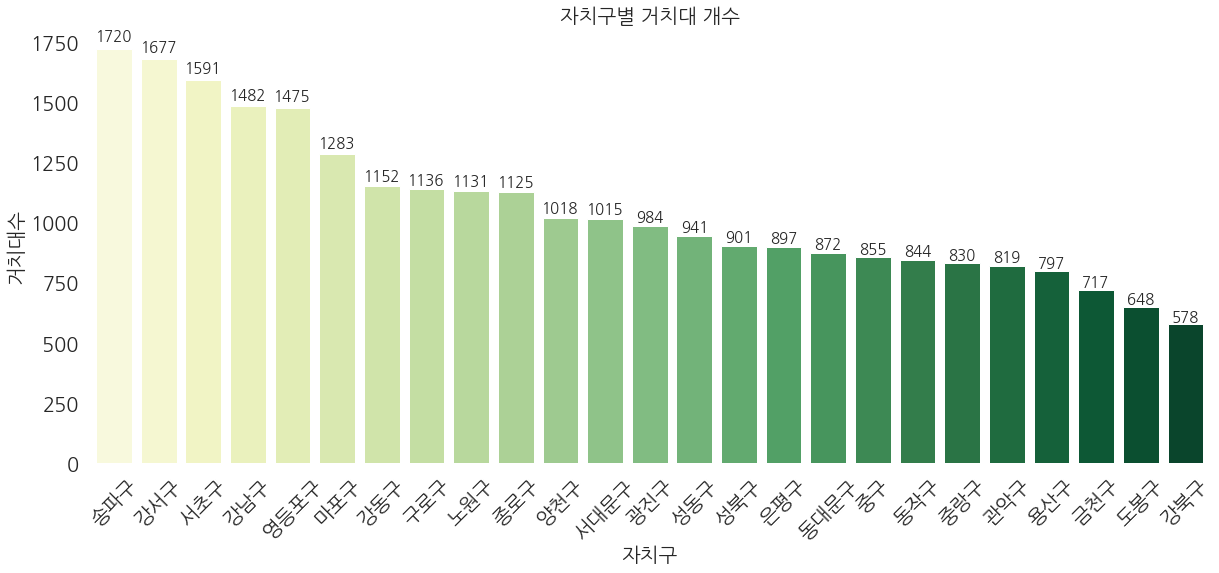

In [7]:
#거치대 개수 시각화
plt.figure(figsize = (20, 8))
ax = sns.barplot(data = Holder, x = '자치구', y = '거치대수', palette = 'YlGn')

#막대 위에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height * 1.02, '%d'%(height), ha = 'center', size = 15)

#각종 폰트 크기 조정
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, size = 20)
plt.xlabel('자치구', fontsize = 20)
plt.ylabel('거치대수', fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('자치구별 거치대 개수' , size = 20)
plt.box(False)
plt.show()

* 자치구별 대여소 개수

In [8]:
#자치구별 대여소 개수 데이터 그룹핑
Group_Rental = Data1.groupby(by = ['자치구']).size()
Group_Rental.sort_values(ascending = False, inplace = True)
Rental = pd.DataFrame(Group_Rental)
Rental.reset_index(inplace = True)
Rental.columns = ['자치구', '대여소수']
Rental.head()

,자치구,대여소수
0,송파구,129
1,강서구,120
2,강남구,118
3,서초구,118
4,영등포구,106


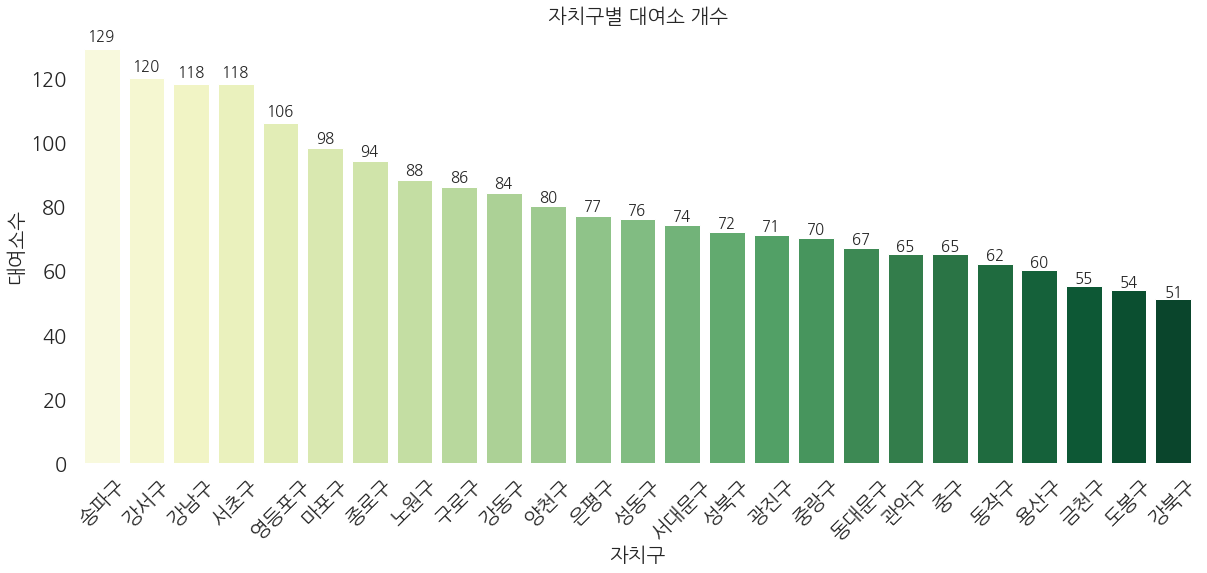

In [9]:
#대여소 개수 시각화
plt.figure(figsize = (20, 8))
ax1 = sns.barplot(data = Rental, x = '자치구', y = '대여소수', palette = 'YlGn')

for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2, height * 1.02, '%d'%(height), ha = 'center', size = 15)

#폰트 및 x축 y축 표시 조정
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 45, size = 20)
plt.xlabel('자치구', fontsize = 20)
plt.ylabel('대여소수', fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('자치구별 대여소 개수' , size = 20)
plt.box(False)
plt.show()

* 지역별 설치 개수 변화

In [10]:
#설치시기 분류
Data1['설치시기'] = pd.to_datetime(Data1['설치시기']) #날짜 형식 변환
Data1['년'] = Data1['설치시기'].dt.year #년, 월 컬럼 추가
Data1['월'] = Data1['설치시기'].dt.month
Data1.head()

,대여소번호,대여소명,자치구,위도,경도,설치시기,거치대수,년,월
4,301.0,경복궁역 7번출구 앞,종로구,37.575794,126.971451,2015-10-07,16,2015,10
5,302.0,경복궁역 4번출구 뒤,종로구,37.575947,126.974060,2015-10-07,12,2015,10
6,303.0,광화문역 1번출구 앞,종로구,37.571770,126.974663,2015-10-07,8,2015,10
7,304.0,광화문역 2번출구 앞,종로구,37.572113,126.977577,2021-01-26,7,2021,1
8,305.0,종로구청 옆,종로구,37.572582,126.978355,2015-10-07,16,2015,10


In [11]:
#대여소 설치 개수 변화 년, 월 기준 그룹핑
#히트맵형식 시각화를 위해 피벗테이블 형식 데이터표현
Pvt_Rental = Data1.pivot_table(index=['년'], columns=['자치구'], values='대여소명', aggfunc = 'nunique', fill_value = 0)
Pvt_Rental = Pvt_Rental.sort_index(ascending=False)
Pvt_Rental.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
년,,,,,,,,,,,,,,,,,,,,,
2021,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,3,0,0
2020,22,28,12,37,17,16,22,12,24,22,...,16,15,32,27,20,21,18,31,26,18
2019,1,0,0,0,1,1,3,1,1,0,...,0,2,0,2,0,0,1,3,0,0
2018,19,16,11,32,5,14,9,7,14,13,...,6,16,40,13,14,8,14,11,8,5
2017,76,40,27,51,42,15,52,35,49,19,...,6,39,57,22,6,10,16,4,4,47


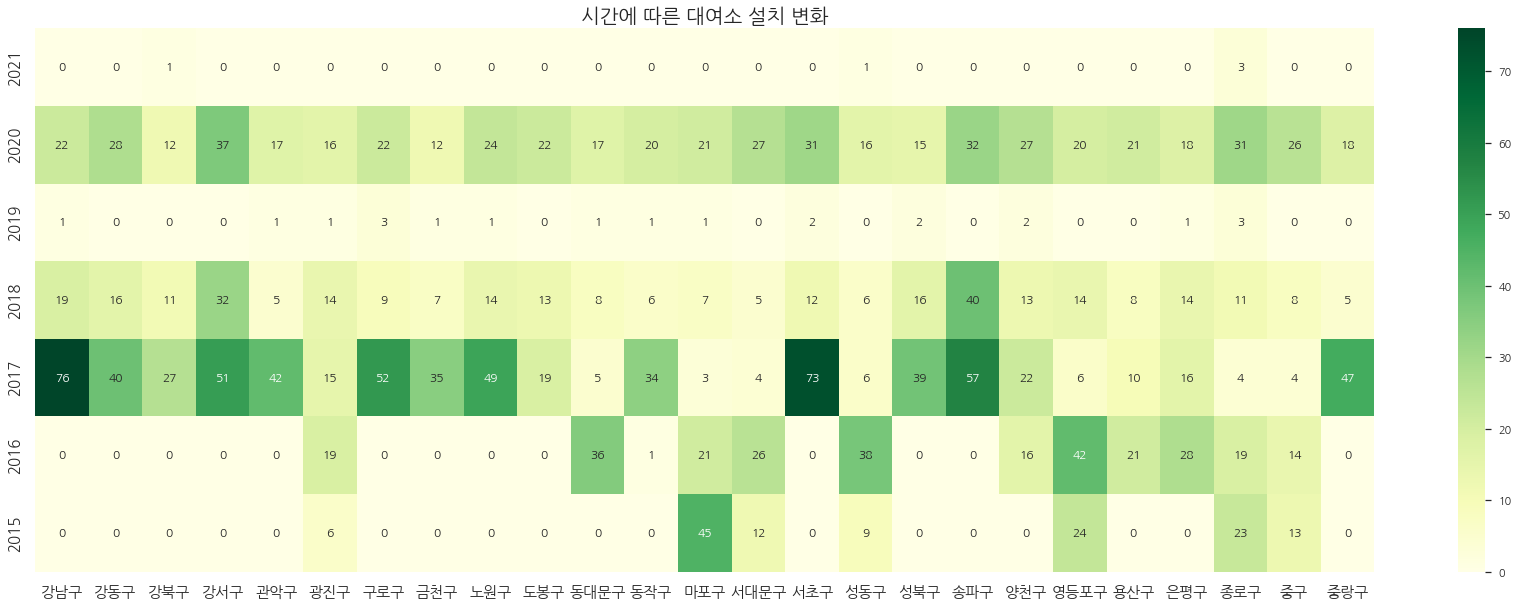

In [12]:
#대여소 변화 히트맵 시각화
plt.figure(figsize = (30 , 10))
ax3 = sns.heatmap(Pvt_Rental, cbar = True, annot = True, cmap = 'YlGn')
plt.title('시간에 따른 대여소 설치 변화', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('')
plt.ylabel('')
plt.show()

* 지역별 대여소당 평균 거치대수

In [13]:
#거치대수/ 대여소수를 통해 평균 거치대수를 구한다
Rent_per_Hold = Rental
Rent_per_Hold['거치대수'] = Holder['거치대수']
Rent_per_Hold['평균'] = Rent_per_Hold['거치대수'] / Rent_per_Hold['대여소수']

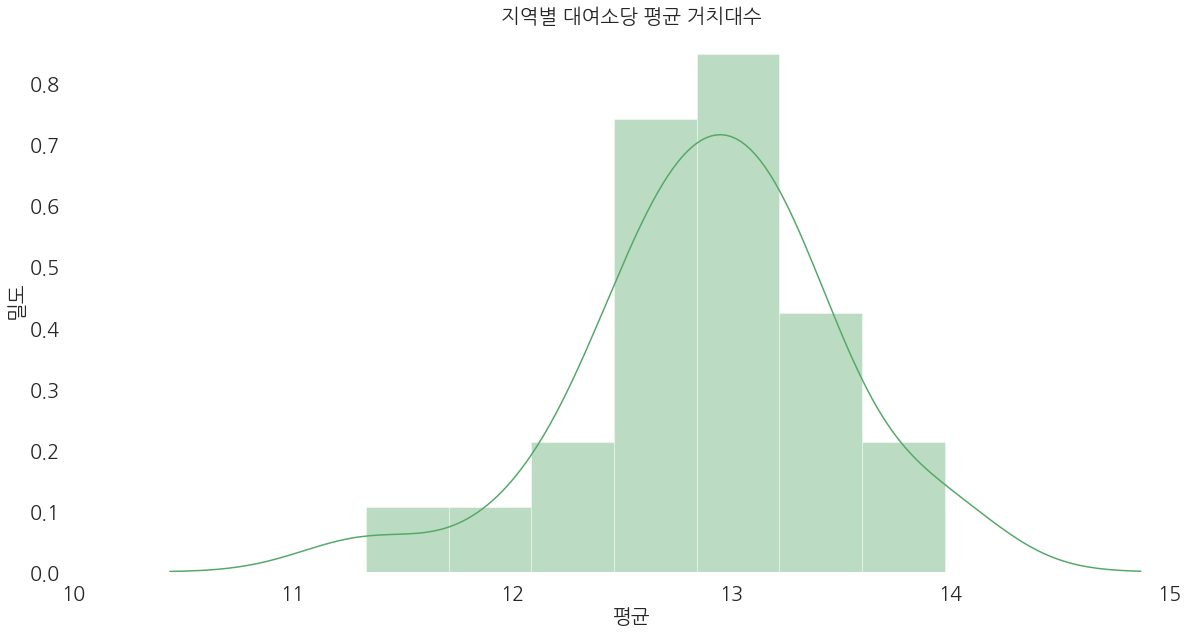

In [14]:
#시각화
plt.figure(figsize = (20, 10))
ax2 = sns.distplot(Rent_per_Hold['평균'], color = 'g')
plt.title('지역별 대여소당 평균 거치대수', size = 20)
plt.xlabel('평균', size = 20)
plt.ylabel('밀도', size = 20)
plt.xticks(range(10,16), fontsize = 20)
plt.yticks(fontsize = 20)
plt.box(False)
plt.show()

* 대여소 분포

In [26]:
#위도 경도 이용해서 대여소간 분포 파악
#위/경도 이용한 두 대여소 간 거리 표현 -> 대여소의 밀집도 파악
#자치구 별로 대여소 위도/경도 페어 구하기
#haversine(a위도/경도, b위도/경도) -> a,b 거리 반환 라이브러리

from haversine import haversine
New_Data1 = pd.DataFrame(Data1)
New_Data1.drop(columns = ['대여소명', '설치시기', '거치대수', '년', '월'], inplace=True) #불필요 컬럼 제거
New_Data1['위도'] = pd.to_numeric(Data1['위도']) #위/경도 계산위해서 형변환
New_Data1['경도'] = pd.to_numeric(Data1['경도'])
Group = New_Data1.groupby(by = ['자치구']) #구별로 그룹핑

dist_dict = {} # key : 자치구 , value : 대어소 간 거리
min_list = []
dist_list = []
for place, df in Group:
    for i, i_row in df.iterrows():
        if len(dist_list) != 0: 
            min_list.append(min(dist_list))
        dist_list = [] #initalize
        for j, j_row in df.iterrows(): # 한 대여소 Fix후 그 외의 대여소와의 거리 순회
            if i == j: #동일 지점 생략
                continue
            i_location = (i_row['위도'], i_row['경도'])
            j_location = (j_row['위도'], j_row['경도'])
            distance = haversine(i_location, j_location, unit = 'm') # m단위 거리 산출
            dist_list.append(distance)  
    dist_dict[place] = min_list #dict 값 추가
    min_list = [] # 가장 가까운 대여소 페어간의 거리를 저장 & initalize

res = pd.DataFrame.from_dict(dist_dict, orient='index') # 배열길이 서로 달라 길이 보정
res = res.transpose()
res = res.fillna(0)
res.head()

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,648.478724,89.452244,382.479368,163.732516,315.516897,52.438924,189.992512,150.559690,395.511672,116.942589,...,505.400576,218.972884,44.585210,258.730568,73.058882,70.436133,74.746232,161.742789,46.877732,63.112723
1,167.702984,243.524052,119.350129,353.250853,222.978905,94.391413,344.401176,138.038600,263.433661,190.832090,...,332.112143,49.519046,138.932530,159.551414,106.408595,307.186585,190.852125,159.356316,461.904111,199.521453
2,685.716271,150.515832,43.187999,399.330227,255.918728,284.874167,408.762168,348.285311,416.703740,238.140268,...,38.525265,114.255548,193.011615,272.189865,116.489445,276.039031,55.870842,230.552620,251.968052,579.045901
3,254.607676,150.515832,268.500297,392.303909,1409.773581,197.504518,60.607067,443.249826,400.948604,142.856286,...,233.715298,255.877670,83.663383,219.102151,250.559821,233.981894,176.471055,189.147853,223.554834,42.732423
4,236.104079,292.871155,287.792950,491.141891,267.697072,137.804725,345.406380,270.863228,113.036209,60.357687,...,112.961574,132.421982,612.957975,79.761356,148.449921,118.594643,259.123783,86.145263,224.946949,253.937180


In [34]:
#지역별 인접 대여소 평균거리
avg_dist = pd.DataFrame(res.mean())
avg_dist.reset_index(level=0, inplace=True)
avg_dist.columns = ['대여소그룹', '평균거리']
avg_dist.sort_values('평균거리', ascending = False, inplace = True)
avg_dist.head()

,대여소그룹,평균거리
14,서초구,275.512748
0,강남구,244.016689
17,송파구,238.034436
3,강서구,221.459204
19,영등포구,197.705638


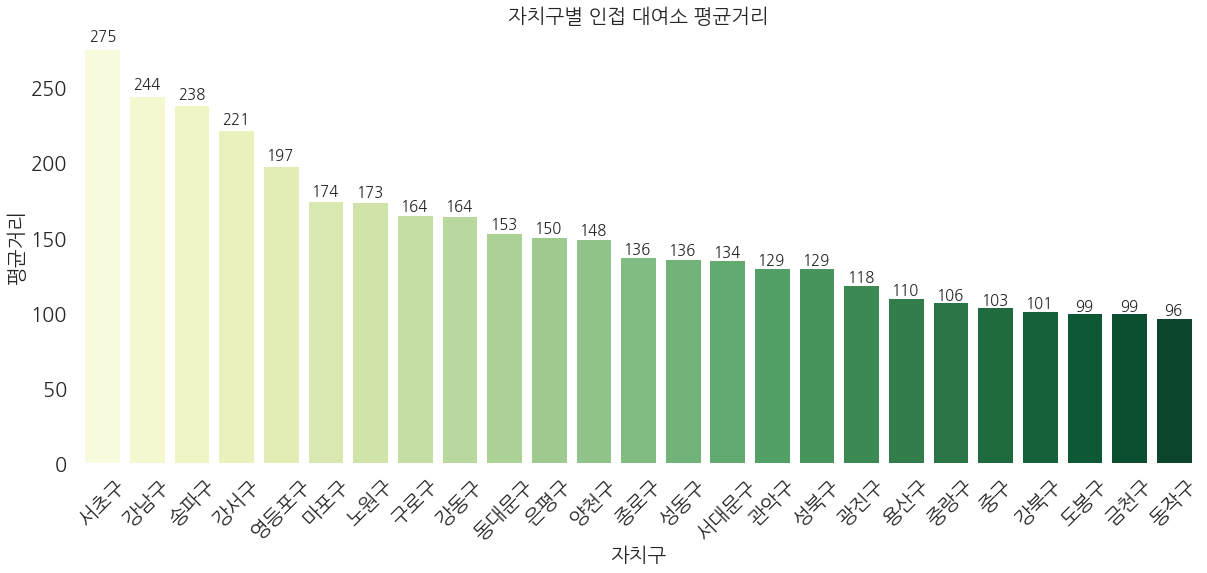

In [35]:
#평균거리 시각화
plt.figure(figsize = (20, 8))
ax1 = sns.barplot(data = avg_dist, x = '대여소그룹', y = '평균거리', palette = 'YlGn')

for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2, height * 1.02, '%d'%(height), ha = 'center', size = 15)

#폰트 및 x축 y축 표시 조정
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 45, size = 20)
plt.xlabel('자치구', fontsize = 20)
plt.ylabel('평균거리', fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('자치구별 인접 대여소 평균거리' , size = 20)
plt.box(False)
plt.show()

In [16]:
location_list1 = ['강남구', '강동구', '강북구', '강서구', '구로구']
location_list2 = ['금천구', '관악구', '광진구', '노원구', '도봉구']
location_list3 = ['동대문구', '동작구', '마포구', '서대문구', '서초구']
location_list4 = ['성동구', '성북구', '송파구', '양천구', '영등포구']
location_list5 = ['용산구', '은평구', '중구', '종로구', '구로구']

location_1 = res[location_list1]
location_2 = res[location_list2]
location_3 = res[location_list3]
location_4 = res[location_list4]
location_5 = res[location_list5]
location_1.head()

,강남구,강동구,강북구,강서구,구로구
0,648.478724,89.452244,382.479368,163.732516,189.992512
1,167.702984,243.524052,119.350129,353.250853,344.401176
2,685.716271,150.515832,43.187999,399.330227,408.762168
3,254.607676,150.515832,268.500297,392.303909,60.607067
4,236.104079,292.871155,287.792950,491.141891,345.406380


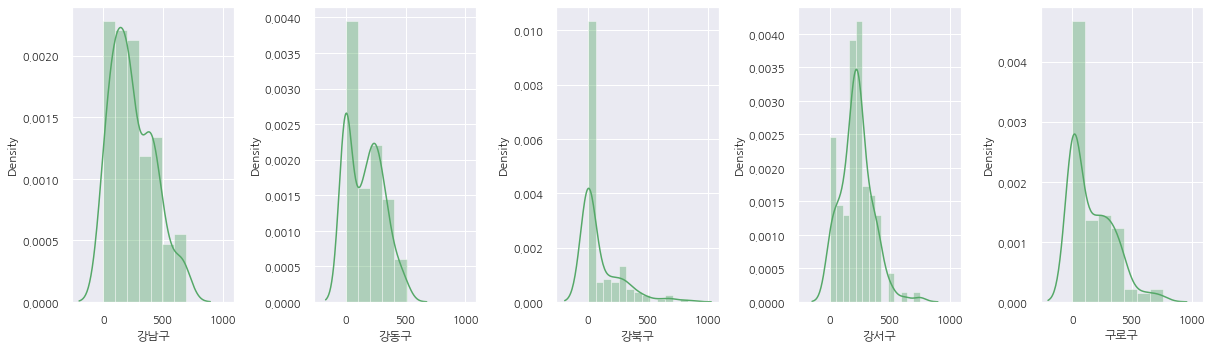

In [63]:
#시각화 5개구로 구분
fig, ax = plt.subplots(1, 5, figsize = (17, 5), sharex = True, tight_layout=True)
i, j = 0, 0

for location, n_row in location_1.iteritems():
    sns.distplot(n_row, ax = ax[i], color = 'g')
    i += 1


plt.tight_layout()
plt.show()

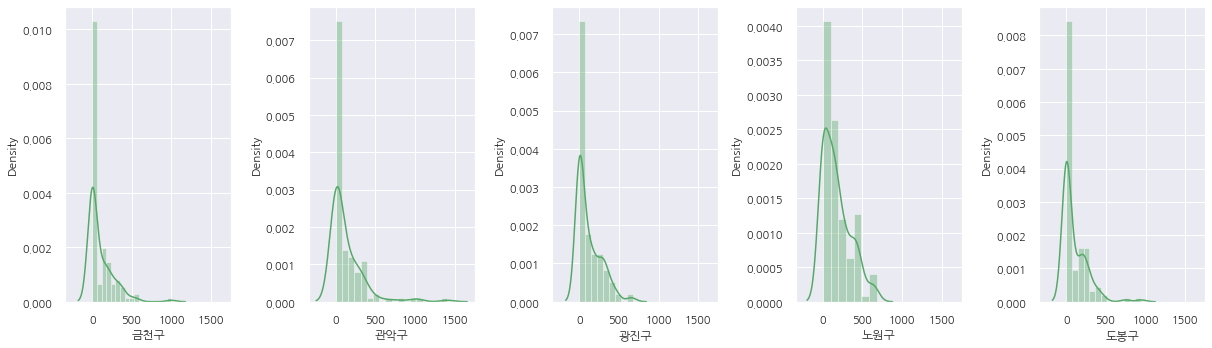

In [64]:
#시각화
fig, ax = plt.subplots(1, 5, figsize = (17, 5), sharex = True, tight_layout=True)
i, j = 0, 0

for location, n_row in location_2.iteritems():
    sns.distplot(n_row, ax = ax[i], color = 'g')
    i += 1


plt.tight_layout()
plt.show()

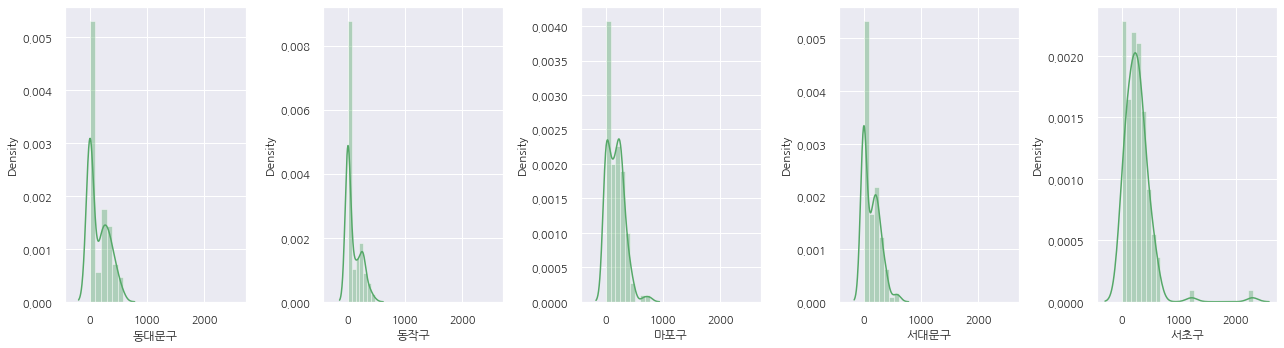

In [60]:
#시각화
fig, ax = plt.subplots(1, 5, figsize = (18, 5), sharex = True, tight_layout=True)
i, j = 0, 0

for location, n_row in location_3.iteritems():
    sns.distplot(n_row, ax = ax[i], color = 'g')
    i += 1


plt.tight_layout()
plt.show()

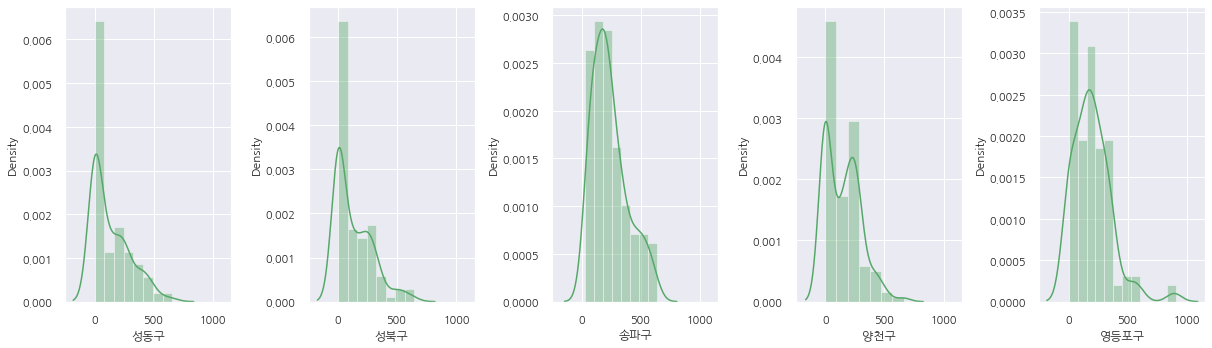

In [66]:
#시각화
fig, ax = plt.subplots(1, 5, figsize = (17, 5), sharex = True, tight_layout=True)
i, j = 0, 0

for location, n_row in location_4.iteritems():
    sns.distplot(n_row, ax = ax[i],color = 'g')
    i += 1


plt.tight_layout()
plt.show()

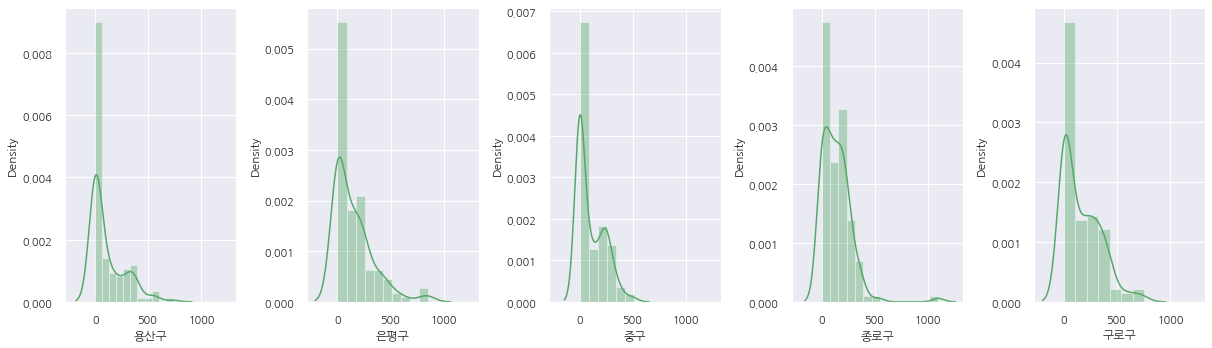

In [65]:
#시각화
fig, ax = plt.subplots(1, 5, figsize = (17, 5), sharex = True, tight_layout=True)
i, j = 0, 0

for location, n_row in location_5.iteritems():
    sns.distplot(n_row, ax = ax[i], color = 'g')
    i += 1

plt.tight_layout()
plt.show()

### 서울시 구별로 이용량

* 시간에 따른 구별 이용량 변화

In [1]:
# 대여소별 대여건수(이용량) 이용정보 
Data2 = pd.read_csv('merge/final/공공자전거 대여소별 이용정보(최종)_17.01_21.12.csv', encoding = 'cp949')

NameError: name 'pd' is not defined

In [32]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139368 entries, 0 to 139367
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여소그룹   133417 non-null  object 
 1   대여소명    133417 non-null  object 
 2   대여일자    133417 non-null  float64
 3   대여건수    133417 non-null  float64
dtypes: float64(2), object(2)
memory usage: 4.3+ MB


In [33]:
Data2 = Data2.dropna(subset=['대여일자'])
Data2 = Data2.dropna(subset=['대여건수'])
Data2 = Data2.dropna(subset=['대여소그룹'])
Data2 = Data2.astype({'대여건수' : int})
Data2 = Data2.astype({'대여일자' : int})
Data2 = Data2.astype({'대여일자' : str})
Data2['년'] = Data2['대여일자'].str[:4]
Data2['월'] = Data2['대여일자'].str[4:]
Data2.head()

,대여소그룹,대여소명,대여일자,대여건수,년,월
0,마포구,서교동 사거리,201701,246,2017,01
1,광진구,자양사거리 광진아크로텔 앞,201701,302,2017,01
2,성동구,금호 어울림 아파트 앞,201701,72,2017,01
3,성동구,성수아이에스비즈타워 앞,201701,169,2017,01
4,성동구,성수아카데미타워 앞,201701,156,2017,01


In [34]:
#연기준 이용량 변화
year = Data2.groupby(['년', '대여소그룹'])[['대여건수']].agg('sum')
df_year = pd.DataFrame(year) #년 + 대여소그룹 데이터프레임
df_year.reset_index(inplace = True)
df_year = df_year.drop(df_year[df_year['대여소그룹'] == ('정비센터')].index)
df_year = df_year.drop(df_year[df_year['대여소그룹'] == ('그룹명 없음')].index) #불필요 행 제거
None_loc_year = df_year.groupby(['년'])[['대여건수']].agg('sum') #연도컬럼 데이터프레임
None_loc_year.reset_index(inplace = True)
df_year.head()

,년,대여소그룹,대여건수
0,2017,강남구,124233
1,2017,강동구,76024
2,2017,강북구,30297
3,2017,강서구,105836
4,2017,관악구,99927


In [35]:
#월기준 이용량 변화
month = Data2.groupby(['년', '월', '대여소그룹'])[['대여건수']].agg('sum')
df_month = pd.DataFrame(month) #년 + 대여소그룹 데이터프레임
df_month.reset_index(inplace = True)
df_month = df_month.drop(df_year[df_year['대여소그룹'] == ('정비센터')].index)#불필요 행 제거
df_month = df_month.drop(df_year[df_year['대여소그룹'] == ('그룹명 없음')].index)
df_month['년/월'] = df_month['년'] + '/' + df_month['월']
df_month.head()

,년,월,대여소그룹,대여건수,년/월
0,2017,01,광진구,4356,2017/01
1,2017,01,동대문구,5444,2017/01
2,2017,01,동작구,126,2017/01
3,2017,01,마포구,16839,2017/01
4,2017,01,서대문구,6090,2017/01


In [43]:
location_list1 = ['강남구', '강동구', '강북구', '강서구', '구로구']
location_list2 = ['금천구', '관악구', '광진구', '노원구', '도봉구']
location_list3 = ['동대문구', '동작구', '마포구', '서대문구', '서초구']
location_list4 = ['성동구', '성북구', '송파구', '양천구', '영등포구']
location_list5 = ['용산구', '은평구', '중구', '종로구', '중랑구']

In [44]:
location1 = pd.concat([df_month[df_month['대여소그룹'] == i] for i in location_list1])
location2 = pd.concat([df_month[df_month['대여소그룹'] == i] for i in location_list2])
location3 = pd.concat([df_month[df_month['대여소그룹'] == i] for i in location_list3])
location4 = pd.concat([df_month[df_month['대여소그룹'] == i] for i in location_list4])
location5 = pd.concat([df_month[df_month['대여소그룹'] == i] for i in location_list5])
location1.sort_index(ascending = True, inplace = True)

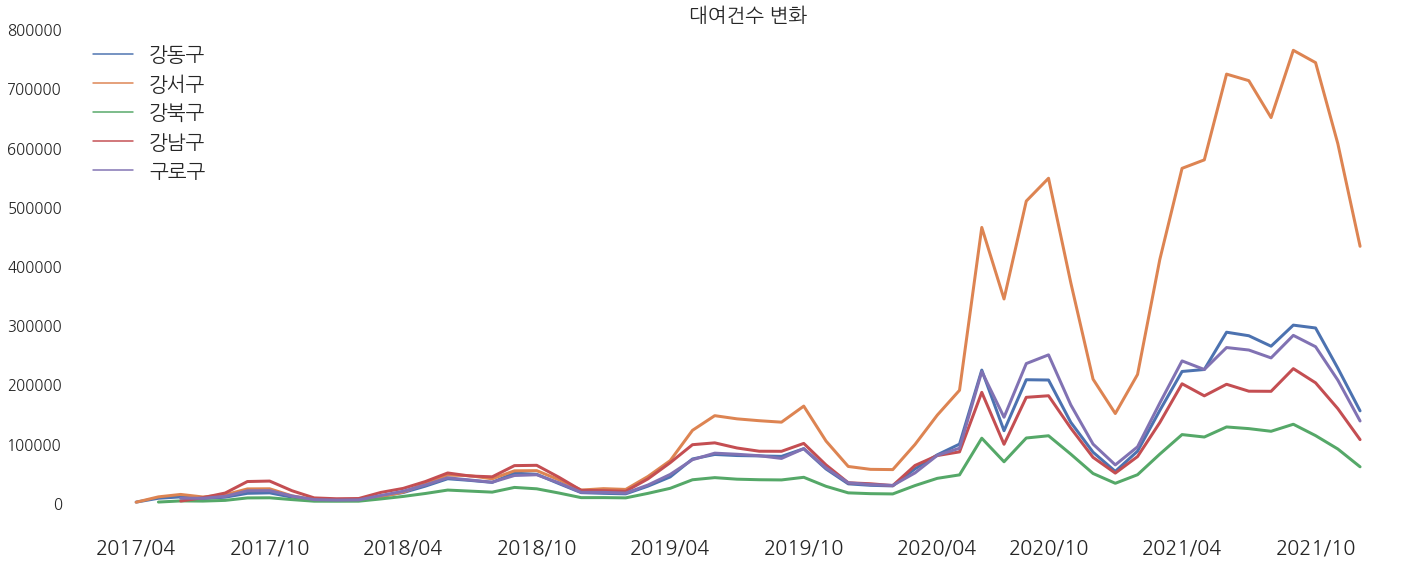

In [38]:
#시각화 5개 구별로
plt.figure(figsize = (20, 8))
ax = sns.lineplot(data = location1, x = '년/월',  y = '대여건수', hue = '대여소그룹', linewidth = 3)

plt.title('대여건수 변화', size = 20)
plt.xticks(['2017/04', '2017/10', '2018/04', '2018/10', '2019/04', '2019/10', '2020/04', '2020/10', '2021/04', '2021/10'], size = 20)
plt.xlabel('')
plt.ylabel('')
plt.yticks(size = 15)
plt.legend(loc = 'upper left', fontsize = 20)
plt.box(False)
plt.tight_layout()
plt.show()

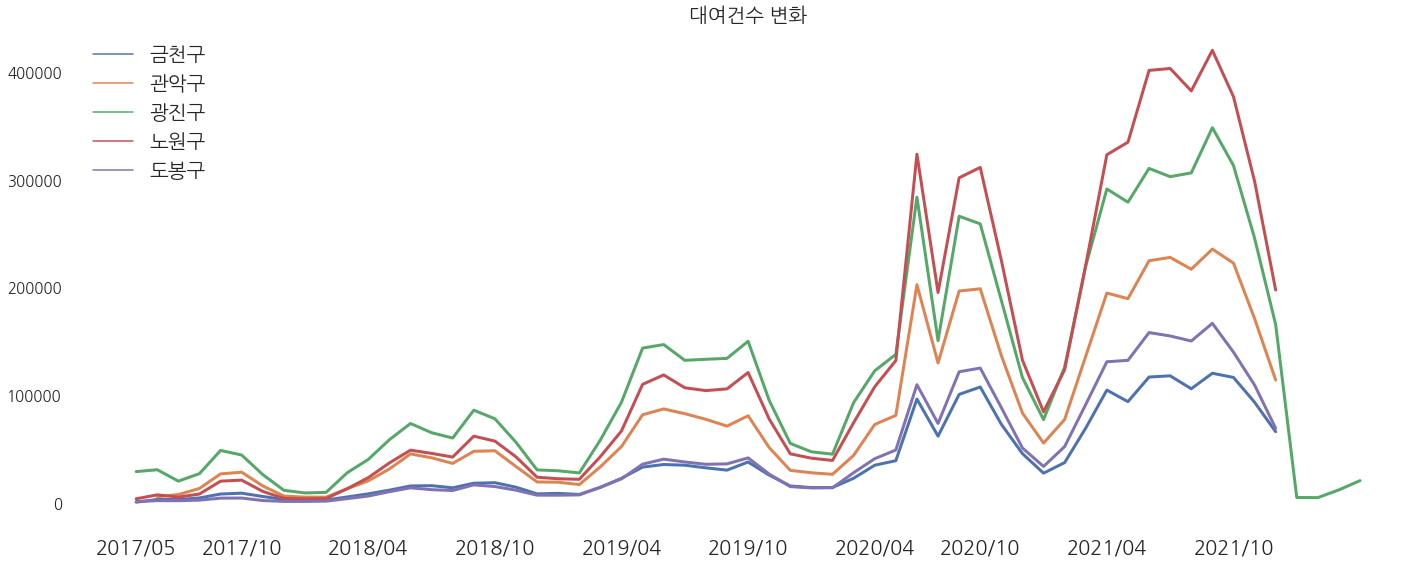

In [46]:
#시각화 5개 구별로
plt.figure(figsize = (20, 8))
ax = sns.lineplot(data = location2, x = '년/월',  y = '대여건수', hue = '대여소그룹', linewidth = 3)

plt.title('대여건수 변화', size = 20)
plt.xticks(['2017/05', '2017/10', '2018/04', '2018/10', '2019/04', '2019/10', '2020/04', '2020/10', '2021/04', '2021/10'], size = 20)
plt.xlabel('')
plt.ylabel('')
plt.yticks(size = 15)
plt.legend(loc = 'upper left', fontsize = 20)
plt.box(False)
plt.tight_layout()
plt.show()

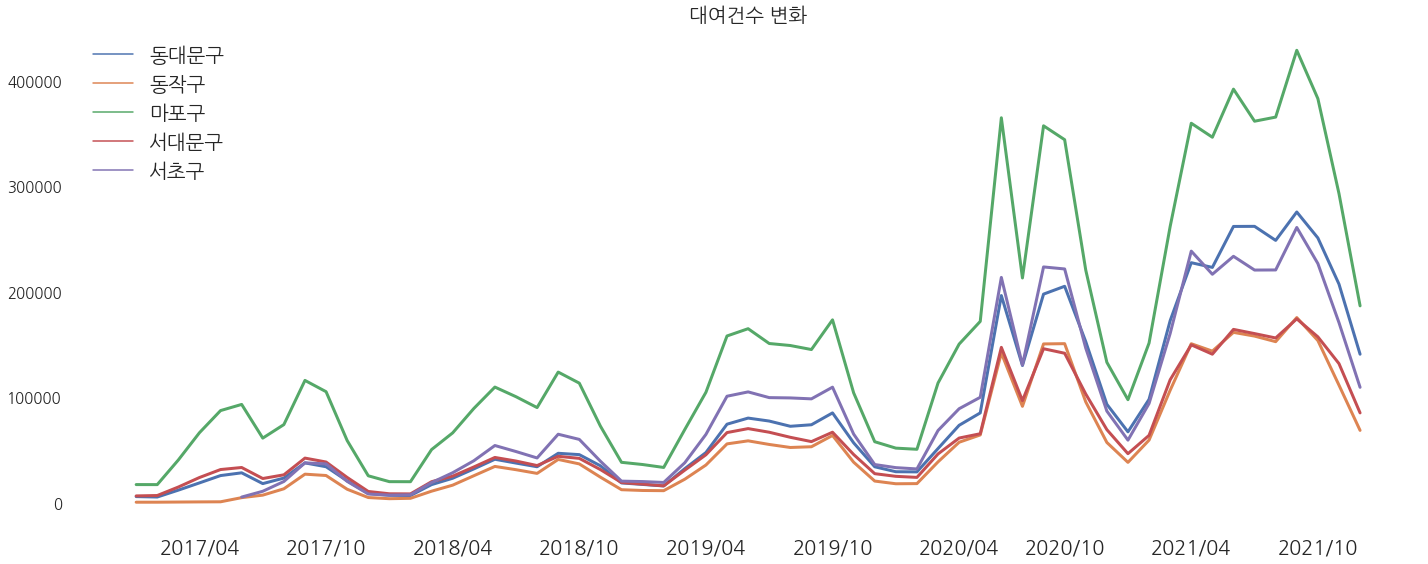

In [40]:
#시각화 5개 구별로
plt.figure(figsize = (20, 8))
ax = sns.lineplot(data = location3, x = '년/월',  y = '대여건수', hue = '대여소그룹', linewidth = 3)

plt.title('대여건수 변화', size = 20)
plt.xticks(['2017/04', '2017/10', '2018/04', '2018/10', '2019/04', '2019/10', '2020/04', '2020/10', '2021/04', '2021/10'], size = 20)
plt.xlabel('')
plt.ylabel('')
plt.yticks(size = 15)
plt.legend(loc = 'upper left', fontsize = 20)
plt.box(False)
plt.tight_layout()
plt.show()

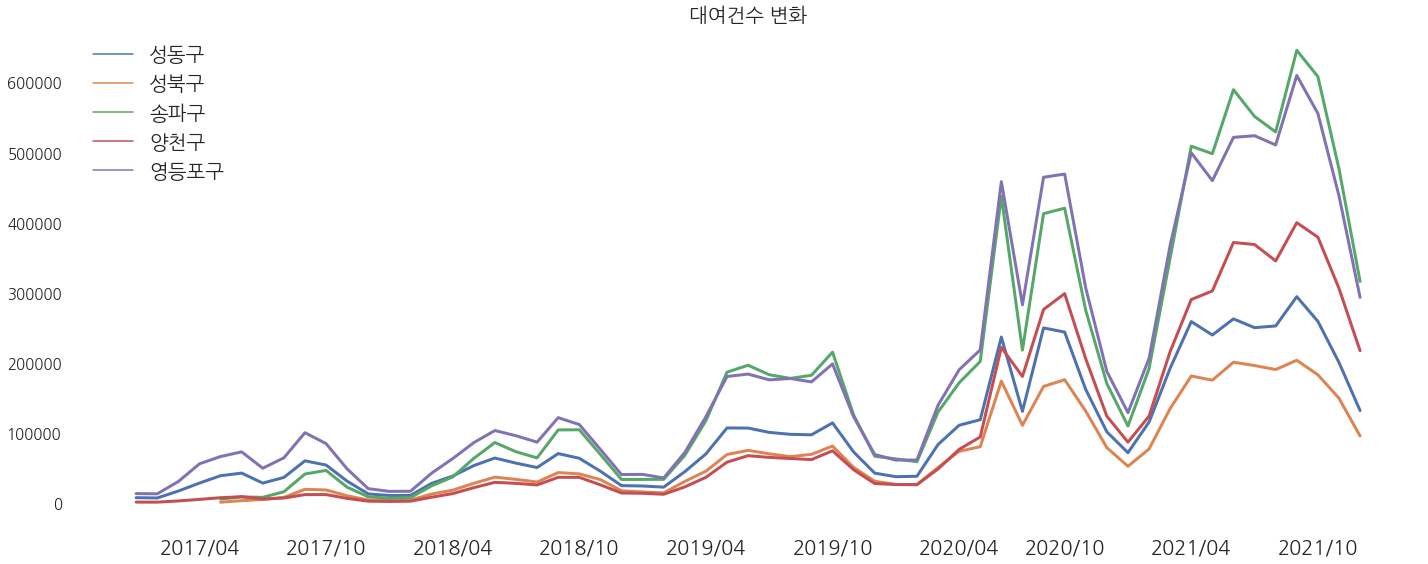

In [41]:
#시각화 5개 구별로
plt.figure(figsize = (20, 8))
ax = sns.lineplot(data = location4, x = '년/월',  y = '대여건수', hue = '대여소그룹', linewidth = 3)

plt.title('대여건수 변화', size = 20)
plt.xticks(['2017/04', '2017/10', '2018/04', '2018/10', '2019/04', '2019/10', '2020/04', '2020/10', '2021/04', '2021/10'], size = 20)
plt.xlabel('')
plt.ylabel('')
plt.yticks(size = 15)
plt.legend(loc = 'upper left', fontsize = 20)
plt.box(False)
plt.tight_layout()
plt.show()

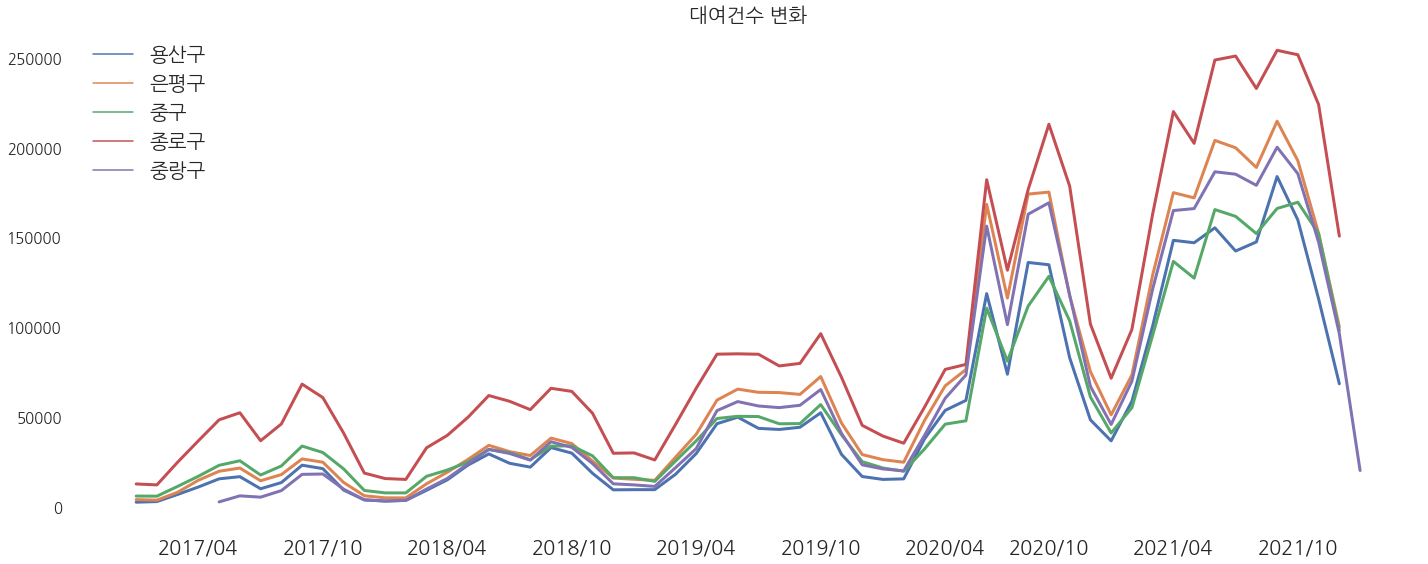

In [45]:
#시각화 5개 구별로
plt.figure(figsize = (20, 8))
ax = sns.lineplot(data = location5, x = '년/월',  y = '대여건수', hue = '대여소그룹', linewidth = 3)

plt.title('대여건수 변화', size = 20)
plt.xticks(['2017/04', '2017/10', '2018/04', '2018/10', '2019/04', '2019/10', '2020/04', '2020/10', '2021/04', '2021/10'], size = 20)
plt.xlabel('')
plt.ylabel('')
plt.yticks(size = 15)
plt.legend(loc = 'upper left', fontsize = 20)
plt.box(False)
plt.tight_layout()
plt.show()

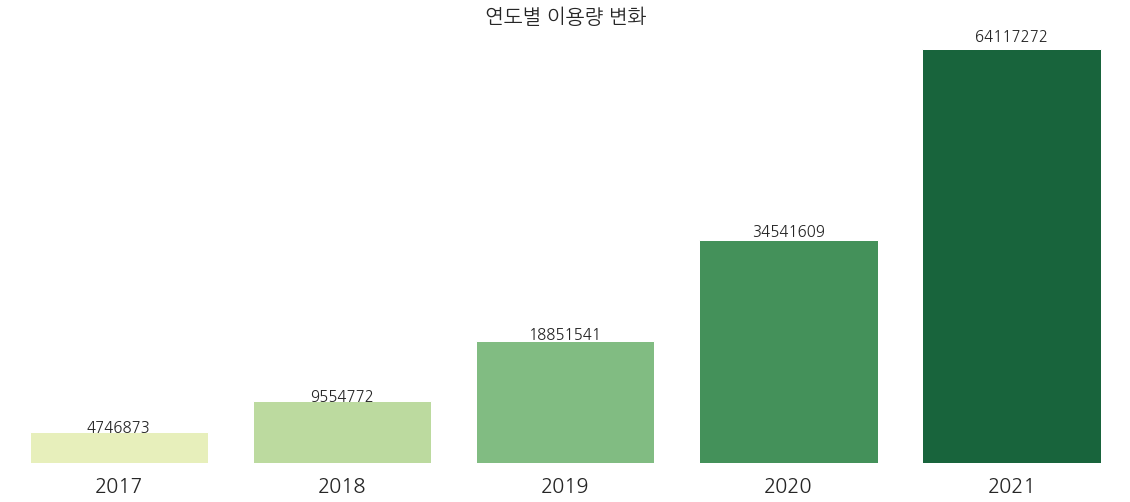

In [211]:
#이용량 변화 시각화
plt.figure(figsize = (20, 8))
ax = sns.barplot(data = None_loc_year, x = '년', y = '대여건수', palette = 'YlGn')

#막대 위에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height * 1.02, '%d'%(height), ha = 'center', size = 15)

plt.title('연도별 이용량 변화' , size = 20)
plt.xlabel('', fontsize = 20)
plt.box(False)
ax.axes.yaxis.set_visible(False)
plt.xticks(fontsize = 20)
plt.show()

In [96]:
Data1 = Data1.drop(Data1[Data1['년'] == 2015].index)
Data1 = Data1.drop(Data1[Data1['년'] == 2016].index)
Pvt_Rental = Data1.pivot_table(index=['년'], columns=['자치구'], values='대여소명', aggfunc = 'nunique', fill_value = 0)
Pvt_Rental = Pvt_Rental.sort_index(ascending=True)
Pvt_Rental = Pvt_Rental.cumsum()
Pvt_Rental.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
년,,,,,,,,,,,,,,,,,,,,,
2017,76,40,27,51,42,15,52,35,49,19,...,6,39,57,22,6,10,16,4,4,47
2018,95,56,38,83,47,29,61,42,63,32,...,12,55,97,35,20,18,30,15,12,52
2019,96,56,38,83,48,30,64,43,64,32,...,12,57,97,37,20,18,31,18,12,52
2020,118,84,50,120,65,46,86,55,88,54,...,28,72,129,64,40,39,49,49,38,70
2021,118,84,51,120,65,46,86,55,88,54,...,29,72,129,64,40,39,49,52,38,70


In [94]:
Pvt_Use = df_year.pivot_table(index=['년'], columns=['대여소그룹'], values='대여건수')
Pvt_Use = Pvt_Use.sort_index(ascending=True)
Pvt_Use.head()

대여소그룹,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
년,,,,,,,,,,,,,,,,,,,,,
2017,124233,76024,30297,105836,99927,273535,78801,32801,76054,15228,...,363962,69549,156801,72135,618871,132955,171711,455441,219840,70644
2018,412788,317230,163594,362208,341819,588898,323074,129347,397445,104683,...,516045,302449,673579,243940,860423,217078,273019,536728,274625,246428
2019,803529,667738,335262,1168633,678042,1193807,680547,292707,937319,314399,...,899601,617879,1583941,550571,1550507,388689,557410,791571,453299,483630
2020,1129241,1270002,672645,2988995,1194680,1704602,1390525,604412,1879743,709417,...,1511172,1092354,2556258,1576470,2836471,772894,1066503,1266663,760648,1006100
2021,1908634,2547154,1152060,6549138,2060560,2981228,2439860,1063510,3563148,1383096,...,2525988,1836912,5369916,3403882,5110330,1461290,1849948,2365948,1517686,1744884


In [95]:
#각 구별 대여소 대비 이용량
Pvt_Compare = (Pvt_Use) + (Pvt_Rental)
Pvt_Compare.head()

대여소그룹,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
년,,,,,,,,,,,,,,,,,,,,,
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.figure(figsize = (30 , 10))
ax1 = sns.heatmap(Pvt_Compare, cbar = True, annot = True, cmap = 'YlGn')
plt.title('각 구별 대여소 대비 이용량', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('')
plt.ylabel('')
plt.show()